# Phase Portraits Demo

This notebook explores the nonlinear dynamics of the FitzHugh-Nagumo model, a two-dimensional reduction of the Hodgkin-Huxley equations used to simulate the activation and recovery of cardiac action potentials. By analyzing the phase portraits, we can visualize how changes in these parameters can alter the trajectory of the heartbeat.


The following cells will do the following:
- Plot the vector field showing the direction of trajectories
- Overlay the nullclines to find the steady states and fixed points
- Simulate a trajectory to visualize how the system "recovers" back to its resting potential

## 1. Phase portrait and vector field visualization
This function plots the membrane potential ($v$) against the recovery variable ($w$), allowing us to see the "flow" of the system.

- **Nullclines:** The $v$-nullcline (cubic) and $w$-nullcline (linear) represent the states where each variable stops changing. Their intersection is the equilibrium or fixed point ($dv/dt = dw/dt = 0$).

- **Vector Field:** The arrows indicate the direction of the trajectory from any given point.

- **Trajectory:** The black line represents a single "heartbeat," showing the rapid excitation and slower recovery back to the equilibrium point.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

def plot_fhn_phase_portrait(a, b, tau, I, init_state=[-0.3, -0.7], t_max=50, save_name=None):
    """
    Generates a phase portrait for the FitzHugh-Nagumo model.
    """
    v_min, v_max = -3, 2
    w_min, w_max = -2, 5

    # 1. System Definition
    def fhn_system(states, t):
        v, w = states
        dvdt = v - (v**3)/3 - w + I
        dwdt = (v + a - b * w) / tau
        return [dvdt, dwdt]

    def find_fixed_point(x):
        return [x[0] - (x[0]**3)/3 - x[1] + I, 
                (x[0] + a - b * x[1]) / tau]

    # grid for vector field
    v_range = np.linspace(v_min, v_max, 20)
    w_range = np.linspace(w_min, w_max, 20)
    V, W = np.meshgrid(v_range, w_range)
    dV = V - (V**3)/3 - W + I
    dW = (V + a - b * W) / tau

    # calculate nullclines
    v_null = np.linspace(v_min - 0.5, v_max + 0.5, 200)
    w_null_v = v_null - (v_null**3)/3 + I
    w_null_w = (v_null + a) / b

    # simulate Trajectory
    t = np.linspace(0, t_max, 2000)
    trajectory = odeint(fhn_system, init_state, t)

    # ------ PLOTTING ------
    fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
    
    # vector field lines
    ax.streamplot(V, W, dV, dW, color='lightgray', linewidth=1, density=1.2, 
                  arrowstyle='-|>', arrowsize=0.8, zorder=1)

    # nullclines
    mask = (v_null >= v_min) & (v_null <= v_max)
    ax.plot(v_null[mask], w_null_v[mask], color='#d62728', lw=1.5, alpha=0.8, label='$v$-nullcline', zorder=2)
    ax.plot(v_null[mask], w_null_w[mask], color='#1f77b4', lw=1.5, alpha=0.8, label='$w$-nullcline', zorder=2)

    # heartbeat trajectory
    ax.plot(trajectory[:,0], trajectory[:,1], color='black', lw=1.5, label='Trajectory', zorder=4)

    # equilibrium point
    v_fp, w_fp = fsolve(find_fixed_point, x0=[-0.5, -0.5])
    ax.scatter(v_fp, w_fp, color='black', edgecolors='white', s=80, zorder=5, label=f'Equilibrium')

    # formatting
    ax.set_xlabel('$v$ (Membrane Potential)', fontsize=10)
    ax.set_ylabel('$w$ (Recovery Variable)', fontsize=10)
    ax.set_xlim(v_min, v_max)
    ax.set_ylim(w_min, w_max)
    ax.legend(frameon=True, loc='upper right')
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.tick_params(
        axis='both',
        which='both',
        direction='in',
        top=True,
        right=True
    )

    plt.tight_layout()
    
    if save_name:
        plt.savefig(save_name)
    
    return fig, ax, t, trajectory


## 2. Plot $v(t)$ over time
Phase portraits show the relationship between variables $v$ and $w$, but this plot shows the evolution of the potential $v(t)$ over time $t$.

This will compare two different parameter sets (varying $a$ and $I$) to demonstrate how parameters affect the shape and duration of the depolarization. 

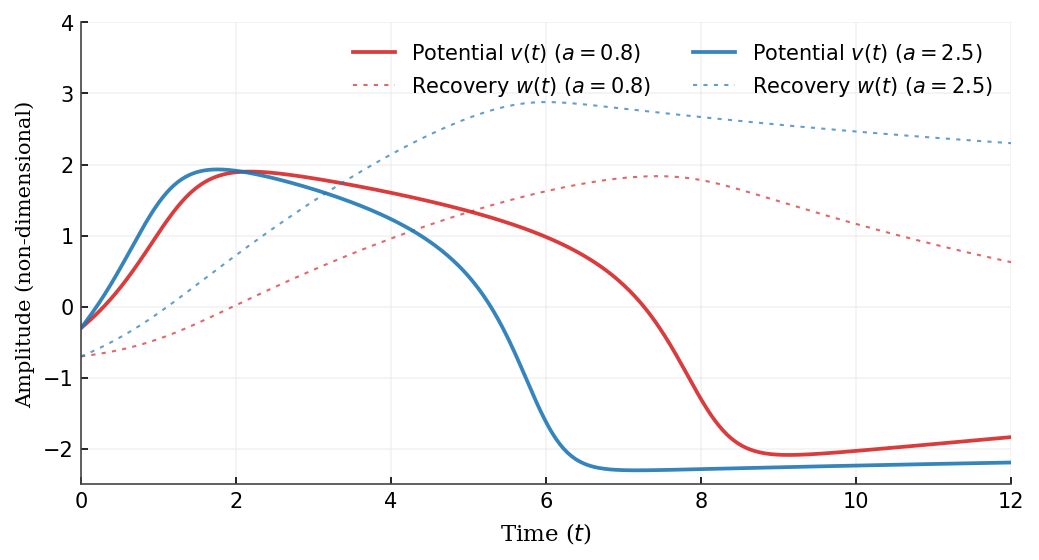

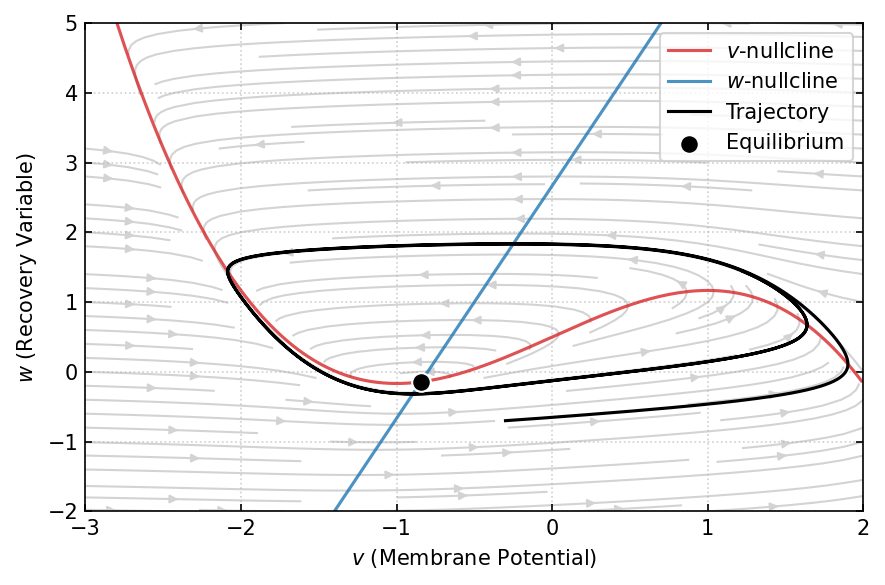

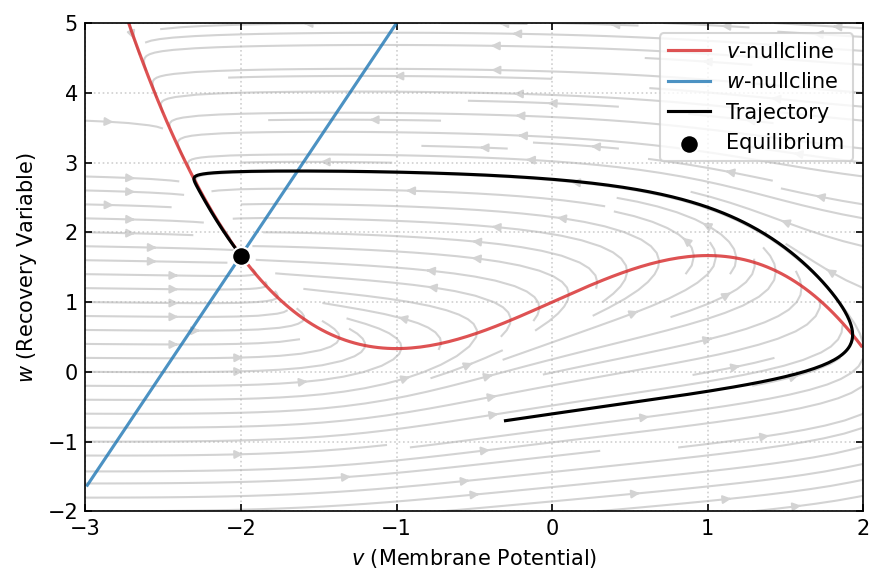

In [10]:
base_params = {'b': 0.3, 'tau': 5.2}
a_values = [0.8, 2.5]
i_values = {0.5, 1}
colors = ['#d62728', '#1f77b4']

fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

for a, i, color in zip(a_values, i_values, colors):
    params = dict(base_params)
    params['a'] = a
    params['I'] = i
    
    _, _, t, trajectory = plot_fhn_phase_portrait(**params, save_name=None)
    
    v = trajectory[:, 0]
    w = trajectory[:, 1]
    
    # potential v(t) 
    ax.plot(t, v, color=color, lw=1.8, alpha=0.9, 
            label=fr"Potential $v(t)$ ($a={a}$)")
    
    # recovery variable w(t)
    ax.plot(t, w, color=color, lw=1, linestyle=(0, (2, 3)), alpha=0.7, 
            label=fr"Recovery $w(t)$ ($a={a}$)")

# formatting
ax.set_xlabel('Time ($t$)', fontsize=11, family='serif')
ax.set_ylabel('Amplitude (non-dimensional)', fontsize=10, family='serif')
ax.set_xlim(0, 12)
ax.set_ylim(-2.5, 4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#444444')
ax.spines['bottom'].set_color('#444444')
ax.tick_params(
    axis='both',
    which='both',
    direction='in'
)

# legend
ax.legend(frameon=False, fontsize=10, loc='upper right', ncol=2)
ax.grid(True, linestyle='-', color='0.9', alpha=0.5)

plt.tight_layout()
plt.show()